# Dataset Source
### https://data.cms.gov/provider-data/dataset/9n3s-kdb3#data-table

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv('./FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv')

In [7]:
pd.reset_option('display.max_columns')

In [17]:
df.shape

(18774, 12)

In [19]:
df.columns

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [23]:
df.dtypes

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               18774 non-null  object 
 1   Facility ID                 18774 non-null  int64  
 2   State                       18774 non-null  object 
 3   Measure Name                18774 non-null  object 
 4   Number of Discharges        8094 non-null   float64
 5   Footnote                    6697 non-null   float64
 6   Excess Readmission Ratio    12077 non-null  float64
 7   Predicted Readmission Rate  12077 non-null  float64
 8   Expected Readmission Rate   12077 non-null  float64
 9   Number of Readmissions      12077 non-null  object 
 10  Start Date                  18774 non-null  object 
 11  End Date                    18774 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


In [21]:
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8916,3.5325,3.9618,Too Few to Report,07/01/2019,06/30/2022
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,NaN,1.1003,23.1263,21.0184,149,07/01/2019,06/30/2022
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,NaN,0.9332,12.9044,13.8283,32,07/01/2019,06/30/2022
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,NaN,0.9871,17.0529,17.2762,68,07/01/2019,06/30/2022
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,NaN,0.9517,9.8131,10.3112,11,07/01/2019,06/30/2022


In [27]:
#Converting the Date to proper datetime format. 
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.8916,3.5325,3.9618,Too Few to Report,2019-07-01,2022-06-30
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,NaN,1.1003,23.1263,21.0184,149,2019-07-01,2022-06-30
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,NaN,0.9332,12.9044,13.8283,32,2019-07-01,2022-06-30
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,NaN,0.9871,17.0529,17.2762,68,2019-07-01,2022-06-30
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,NaN,0.9517,9.8131,10.3112,11,2019-07-01,2022-06-30


In [13]:
df.describe()

,Facility ID,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,18774.000000,8094.000000,6697.000000,12077.000000,12077.000000,12077.000000
mean,261506.077661,244.251915,3.147230,1.001776,15.098235,15.066446
std,163743.437584,227.648660,2.084349,0.077018,5.480391,5.354170
min,10001.000000,0.000000,1.000000,0.615900,1.927900,2.674900
25%,110086.000000,105.000000,1.000000,0.958000,12.436800,12.495800
50%,250049.000000,176.000000,5.000000,0.997800,16.485500,16.571000
75%,390113.000000,308.000000,5.000000,1.041900,19.056700,19.139000
max,670319.000000,4994.000000,7.000000,1.516200,28.147200,26.268400


In [29]:
print(df.isnull().sum())

Facility Name                     0
Facility ID                       0
State                             0
Measure Name                      0
Number of Discharges          10680
Footnote                      12077
Excess Readmission Ratio       6697
Predicted Readmission Rate     6697
Expected Readmission Rate      6697
Number of Readmissions         6697
Start Date                        0
End Date                          0
dtype: int64


In [31]:
# Drop 'Footnote' column (high missing values)
df.drop(columns=['Footnote'], inplace = True)

In [33]:
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,0.8916,3.5325,3.9618,Too Few to Report,2019-07-01,2022-06-30
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,1.1003,23.1263,21.0184,149,2019-07-01,2022-06-30
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,0.9332,12.9044,13.8283,32,2019-07-01,2022-06-30
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,0.9871,17.0529,17.2762,68,2019-07-01,2022-06-30
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,0.9517,9.8131,10.3112,11,2019-07-01,2022-06-30


In [37]:
# Filling out the null values with median. 
df['Number of Discharges'].fillna(df['Number of Discharges'].median(), inplace=True)
df['Excess Readmission Ratio'].fillna(df['Excess Readmission Ratio'].median(), inplace=True)
df['Predicted Readmission Rate'].fillna(df['Predicted Readmission Rate'].median(), inplace=True)
df['Expected Readmission Rate'].fillna(df['Expected Readmission Rate'].median(), inplace=True)

C:\Users\neela\AppData\Local\Temp\ipykernel_28280\1965015688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Discharges'].fillna(df['Number of Discharges'].median(), inplace=True)
C:\Users\neela\AppData\Local\Temp\ipykernel_28280\1965015688.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [39]:
# Converting the object to Numeric type. 
df['Number of Readmissions']= pd.to_numeric(df['Number of Readmissions'], errors='coerce')
df['Number of Readmissions'].fillna(df['Number of Readmissions'].median(), inplace=True)

C:\Users\neela\AppData\Local\Temp\ipykernel_28280\1384616788.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Readmissions'].fillna(df['Number of Readmissions'].median(), inplace=True)


In [63]:
df.isnull().sum()

Facility Name                 0
Facility ID                   0
State                         0
Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
Start Date                    0
End Date                      0
dtype: int64

## EDA

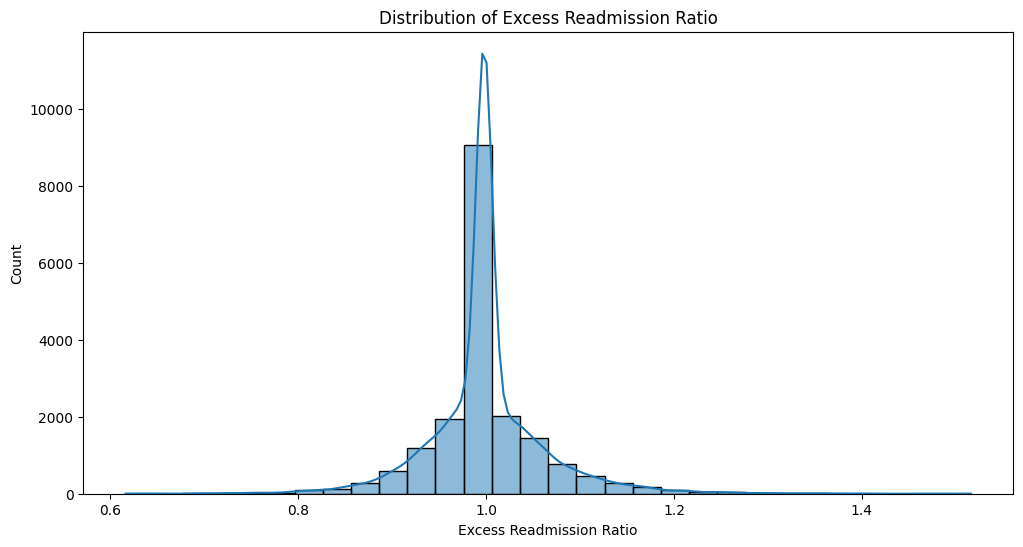

In [78]:
plt.figure(figsize=(12,6))
sns.histplot(df['Excess Readmission Ratio'], bins=30, kde=True)
plt.title('Distribution of Excess Readmission Ratio')
plt.show()

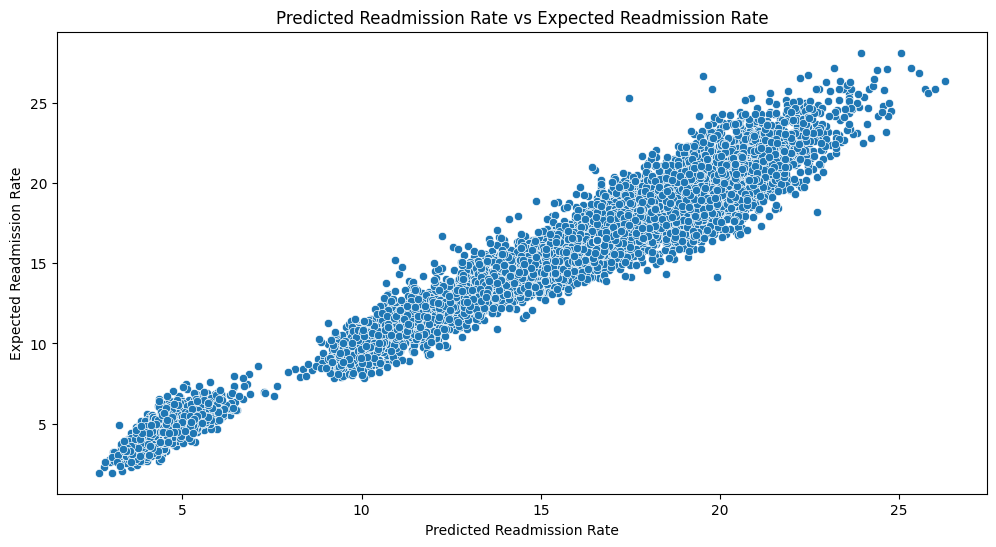

In [92]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Expected Readmission Rate'], y=df['Predicted Readmission Rate'])
plt.xlabel('Predicted Readmission Rate')
plt.ylabel('Expected Readmission Rate')
plt.title('Predicted Readmission Rate vs Expected Readmission Rate')
plt.show()

# Feature Engineering

In [95]:
# Creating a featute Redmission Rate Difference
df['Readmission Rate Difference'] = df['Predicted Readmission Rate'] - df['Expected Readmission Rate']

In [97]:
# Category created to assign high and low readmission rates. 
df['Readmission Rate Category'] = np.where(df['Excess Readmission Ratio'] > 1, 'High', 'Low')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Facility Name                18774 non-null  object        
 1   Facility ID                  18774 non-null  int64         
 2   State                        18774 non-null  object        
 3   Measure Name                 18774 non-null  object        
 4   Number of Discharges         18774 non-null  float64       
 5   Excess Readmission Ratio     18774 non-null  float64       
 6   Predicted Readmission Rate   18774 non-null  float64       
 7   Expected Readmission Rate    18774 non-null  float64       
 8   Number of Readmissions       18774 non-null  float64       
 9   Start Date                   18774 non-null  datetime64[ns]
 10  End Date                     18774 non-null  datetime64[ns]
 11  Readmission Rate Difference  18774 non-nu

In [101]:
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmission Rate Difference,Readmission Rate Category
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,176.0,0.8916,3.5325,3.9618,29.0,2019-07-01,2022-06-30,-0.4293,Low
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,616.0,1.1003,23.1263,21.0184,149.0,2019-07-01,2022-06-30,2.1079,High
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,274.0,0.9332,12.9044,13.8283,32.0,2019-07-01,2022-06-30,-0.9239,Low
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,404.0,0.9871,17.0529,17.2762,68.0,2019-07-01,2022-06-30,-0.2233,Low
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,126.0,0.9517,9.8131,10.3112,11.0,2019-07-01,2022-06-30,-0.4981,Low


In [103]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['State', 'Measure Name'], drop_first=True)

In [105]:
# Preparing data for model training
X = df.drop(columns=['Readmission Rate Category', 'Facility Name', 'Facility ID', 'Start Date', 'End Date'])
y = df['Readmission Rate Category']

In [113]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
# Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [119]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.9954727030625832
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      0.99      1152
         Low       0.99      1.00      1.00      2603

    accuracy                           1.00      3755
   macro avg       1.00      0.99      0.99      3755
weighted avg       1.00      1.00      1.00      3755

Confusion Matrix:
 [[1135   17]
 [   0 2603]]

Random Forest Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      1152
         Low       1.00      1.00      1.00      2603

    accuracy                           1.00      3755
   macro avg       1.00      1.00      1.00      3755
weighted avg       1.00      1.00      1.00      3755

Confusion Matrix:
 [[1152    0]
 [   0 2603]]

Support Vector Machine Performance:
Accuracy: 0.970439414114514
Classification Report:
             

In [121]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [123]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [124]:
print("\nBest Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9999334221038616


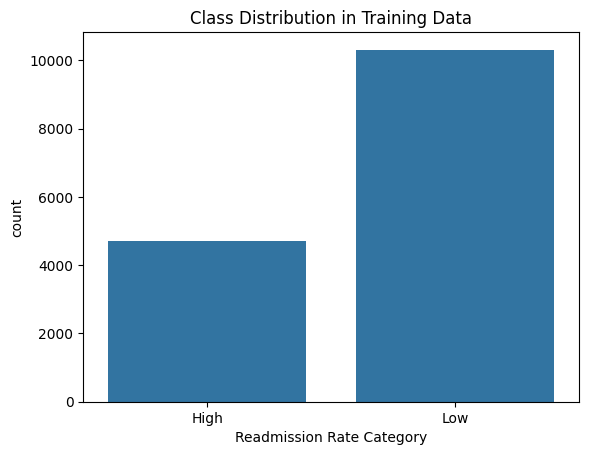

Readmission Rate Category
Low     0.686664
High    0.313336
Name: proportion, dtype: float64


In [129]:
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Data")
plt.show()

print(y_train.value_counts(normalize=True))  # Percentage distribution

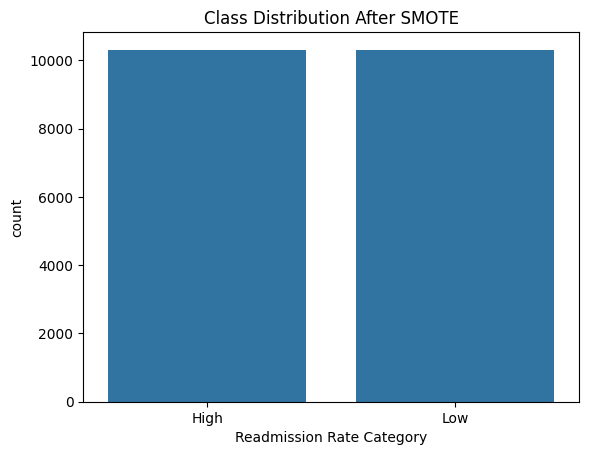

In [131]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new distribution
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

In [135]:
# Train models again with balanced data
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
    y_pred = model.predict(X_test)  # Test on original test data

    print(f"\n{name} Performance After SMOTE:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Performance After SMOTE:
Accuracy: 0.9973368841544608
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      1.00      1152
         Low       1.00      1.00      1.00      2603

    accuracy                           1.00      3755
   macro avg       1.00      1.00      1.00      3755
weighted avg       1.00      1.00      1.00      3755

Confusion Matrix:
 [[1143    9]
 [   1 2602]]

Random Forest Performance After SMOTE:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      1152
         Low       1.00      1.00      1.00      2603

    accuracy                           1.00      3755
   macro avg       1.00      1.00      1.00      3755
weighted avg       1.00      1.00      1.00      3755

Confusion Matrix:
 [[1152    0]
 [   0 2603]]

Support Vector Machine Performance After SMOTE:
Accuracy: 0.977896138482024


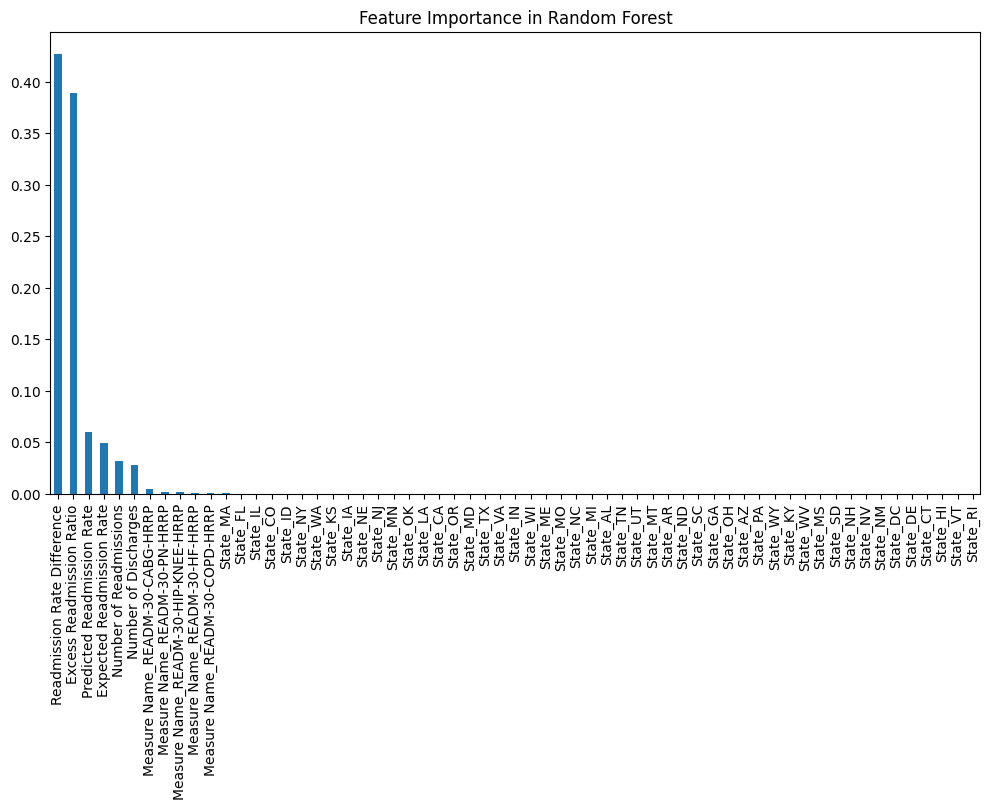

In [137]:
# Get feature importance from Random Forest
rf_model = models['Random Forest']
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance in Random Forest")
plt.show()